In [ ]:
%%time
from sympy import *
import numpy as np
import csv
import pandas as pd
arr = np.zeros((101, 101), dtype = float)
x1 = np.zeros(101, dtype = float)
y1 = np.zeros(101, dtype = float)
l = []
x = symbols("x")
Ro = 2.5
rs = 1 / 3
ra = 1 / 3
B = Ro * rs
S = 0.9995
ts = 1.0
ta = 0.1

for Q in range(0, 101):#(100, -1, -1)
    check = True
    for P in range(0, 101):#(100, -1, -1)
        q = Q * 0.01
        p = P * 0.01
        Ba = B * q
        a = 1
        b = 0
        c = - B * S * (1 - p) / (ts + rs)
        d = - q * B * S * p / (ta +ra)
        ro = solve(Eq(a * x ** 3 + b * x ** 2 + c * x + d, 0), x)
        for i in range(len(ro)):
            if np.iscomplex(ro[i]) == True and abs((ro[i]).imag) < 0.0000001:
                l.append((ro[i]).real)
            if np.iscomplex(ro[i]) == False:
                l.append(ro[i])
        arr[Q][P] = abs(max(l, key = abs, default=0))
        l = []
        if check:
            if arr[Q][P] > 1:
                x1[Q] = P
                y1[Q] = Q
                check = False
        
#df = pd.DataFrame(arr)
#df.to_csv('out_9_tauS1.0.csv')

In [34]:
%%time
def cubic_equation(a,b,c,d):
    p = -b**2/(9.0*a**2) + c/(3.0*a)
    q = b**3/(27.0*a**3) - b*c/(6.0*a**2) + d/(2.0*a)
    t = complex(q**2+p**3)
    w =(-1.0 +1j*3.0**0.5)/2.0
    
    u = [0,0,0]
    u[0] = (-q +t**0.5)**(1.0/3.0)
    u[1] = u[0] * w
    u[2] = u[0] * w**2
    v = [0,0,0]
    v[0] = (-q -t**0.5)**(1.0/3.0)
    v[1] = v[0] * w
    v[2] = v[0] * w**2

    x_list = []
    for i in range(3):
        for j in range(3):
            if abs(u[i]*v[j] + p) < 0.0001:
                x = u[i] + v[j]
                if abs(x.imag) < 0.0000001:
                    x = x.real - b/(3.0*a)
                    x_list.append(x)
    return abs(max(x_list, key = abs, default=0))

import numpy as np
import pandas as pd
arr = np.zeros((101, 101), dtype = float)
#x1 = np.zeros(101, dtype = float)
#y1 = np.zeros(101, dtype = float)
x1 = []
y1 = []
Ro = 2.5
rs = 1 / 3
ra = 1 / 3
B = Ro * rs
S = 0.9995
ts = 0.1
ta = 0.1
a = 1
b = 0
for Q in range(0, 101):#(100, -1, -1) or (0, 101)
    check = True
    for P in range(0, 101):#(100, -1, -1) or (0, 101)
        Ba = B * Q * 0.01
        c = - B * S * (1 - P * 0.01) / (ts + rs)
        d = - Q * 0.01 * B * S * P * 0.01 / (ta +ra)
        roo = (cubic_equation(a,b,c,d))
        arr[Q][P] = roo
        if check:
            if arr[Q][P] > 1:
                x1.append(P)
                y1.append(Q)
                check = False
#print(x1,y1)
#df = pd.DataFrame(arr)
#df.to_csv('out00.csv')

Wall time: 90.1 ms


In [7]:
print(x1,y1)
#target = 0  # 要素0をlistから取り除きたい
#x1 = [item for item in x1 if item != target]  # 取り除く＝それ以外を残す
#y1 = [item for item in y1 if item != target]

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 97, 95, 94, 92, 90, 88, 87, 85, 84, 82, 81, 79, 78, 77, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 63, 62, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 53, 53, 52, 52, 51, 51, 50, 49, 49, 48, 48, 47] [100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


ファイルのパスを入力してください"C:\Users\RTE08\source\repos\ode\Result\1_6\It_20_tauS_1.0_d_0.01_p_q.csv"


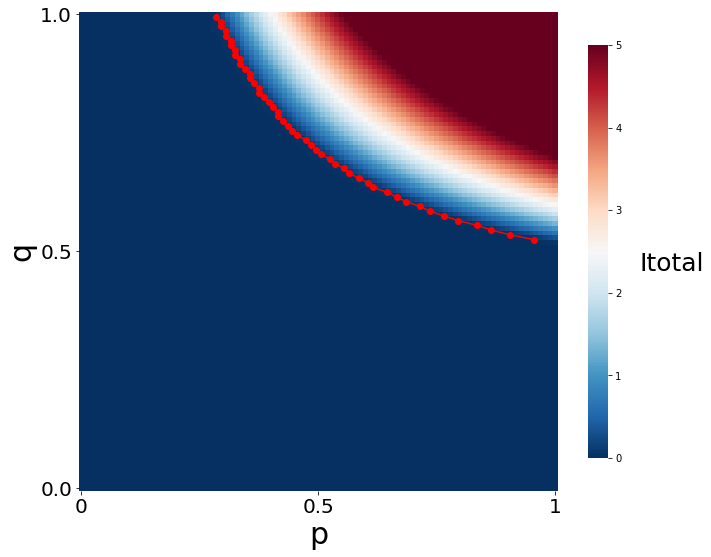

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as ticker
import numpy as np
filedir = input("ファイルのパスを入力してください")
filedir=filedir.replace('"','').strip()
filename=os.path.basename(filedir)
dataset1=pd.read_csv(filedir, index_col="q")
fsize=30
#mask = np.zeros_like(dataset1)
#mask[np.tril_indices_from(mask)] = True
ax=sns.heatmap(data=dataset1, cmap="RdBu_r", annot=False, fmt=".2f", vmax=5, vmin=0, square=True, xticklabels=50, yticklabels=50, cbar_kws={'shrink': 0.6})
ax.figure.axes[-1].set_ylabel('Itotal', size=25, rotation= 0, labelpad=50)
ax.figure.set_size_inches(10,10)
ax.invert_yaxis()
plt.title("",fontsize=fsize)
plt.xlabel("p",fontsize=fsize)
plt.xticks(rotation= 0)
plt.xticks(fontsize=fsize-10)
plt.ylabel("q",fontsize=fsize)
plt.yticks(rotation= 0)
plt.yticks(fontsize=fsize-10)
plt.plot(x1, y1, marker = "o", color = "red")
plt.tight_layout()
plt.savefig('./result/2000days_d/' + filename+'.png', bbox_inches='tight')

In [12]:
print(x1,y1)

[96.0, 91.0, 87.0, 84.0, 80.0, 77.0, 74.0, 72.0, 69.0, 67.0, 65.0, 62.0, 61.0, 59.0, 57.0, 56.0, 54.0, 53.0, 51.0, 50.0, 49.0, 48.0, 46.0, 45.0, 44.0, 43.0, 42.0, 42.0, 41.0, 40.0, 39.0, 38.0, 38.0, 37.0, 36.0, 36.0, 35.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 29.0] [53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [24]:
import csv
with open("out.csv") as f:
    for row in csv.reader(f, quoting=csv.QUOTE_NONNUMERIC):
        print(row)

['', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
[0.0, 1.3127360214715562, 1.3061558496015244, 1.299542359766541, 1.292895040676891, 1.2862133678306293, 1.2794968030305975, 1.2727447938785017, 1.2659567732447028, 1.2591321587122815, 1.2522703519938336, 1.2453707383193449, 1.23843268579337, 1.2314555447196176, 1.2244386468908925, 1.217381304842205, 1.2102828110646784, 1.2031424371777142, 1.1959594330566736, 1.1887330259131148, 1.181462419324398

ファイルのパスを入力してください"C:\Users\RTE08\python\equation\out_9_tauS1.0.csv"


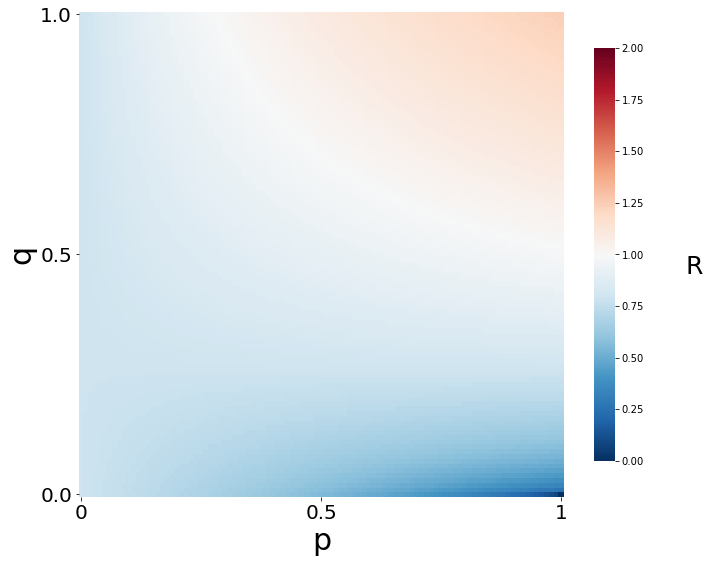

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as ticker
import numpy as np
filedir = input("ファイルのパスを入力してください")
filedir=filedir.replace('"','').strip()
filename=os.path.basename(filedir)
dataset1=pd.read_csv(filedir, index_col="q")
fsize=30
#mask = np.zeros_like(dataset1)
#mask[np.tril_indices_from(mask)] = True
ax=sns.heatmap(data=dataset1, cmap="RdBu_r", annot=False, fmt=".2f", vmax=2, vmin=0, square=True, xticklabels=50, yticklabels=50, cbar_kws={'shrink': 0.6})
ax.figure.axes[-1].set_ylabel('R', size=25, rotation= 0, labelpad=50)
ax.figure.set_size_inches(10,10)
ax.invert_yaxis()
plt.title("",fontsize=fsize)
plt.xlabel("p",fontsize=fsize)
plt.xticks(rotation= 0)
plt.xticks(fontsize=fsize-10)
plt.ylabel("q",fontsize=fsize)
plt.yticks(rotation= 0)
plt.yticks(fontsize=fsize-10)
plt.tight_layout()
plt.savefig(filename+'.png', bbox_inches='tight')

ファイルのパスを入力してください"C:\Users\RTE08\python\equation\out_2.csv"


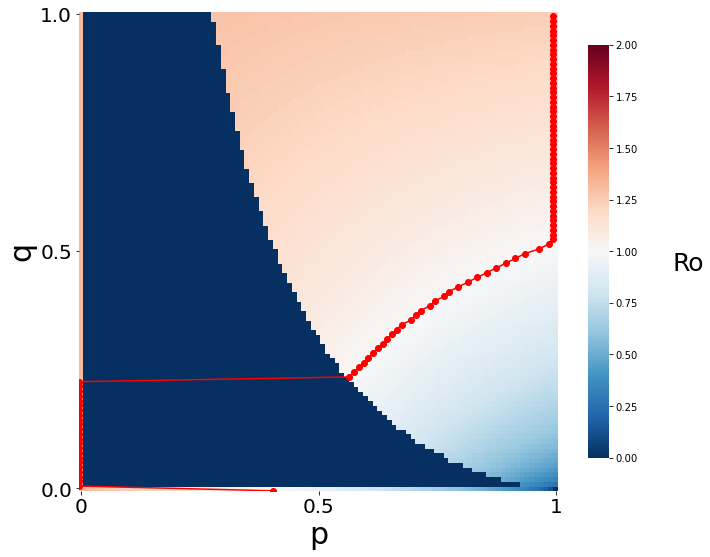

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as ticker
import numpy as np
filedir = input("ファイルのパスを入力してください")
filedir=filedir.replace('"','').strip()
filename=os.path.basename(filedir)
dataset1=pd.read_csv(filedir, index_col="q")
fsize=30
#mask = np.zeros_like(dataset1)
#mask[np.tril_indices_from(mask)] = True
ax=sns.heatmap(data=dataset1, cmap="RdBu_r", annot=False, fmt=".2f", vmax=2, vmin=0, square=True, xticklabels=50, yticklabels=50, cbar_kws={'shrink': 0.6})
ax.figure.axes[-1].set_ylabel('Ro', size=25, rotation= 0, labelpad=50)
ax.figure.set_size_inches(10,10)
ax.invert_yaxis()
plt.title("",fontsize=fsize)
plt.xlabel("p",fontsize=fsize)
plt.xticks(rotation= 0)
plt.xticks(fontsize=fsize-10)
plt.ylabel("q",fontsize=fsize)
plt.yticks(rotation= 0)
plt.yticks(fontsize=fsize-10)
plt.plot(x1, y1, marker = "o", color = "red")
plt.tight_layout()
plt.savefig(filename+'.png', bbox_inches='tight')